# Generative Adversarial Networks


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [ ]:
# Define Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 268kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.0MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Create Generator
generator = Generator()
noise = torch.randn(1, 100)
generated_image = generator(noise)

print("Generated Image Tensor Shape:", generated_image.shape)

Generated Image Tensor Shape: torch.Size([1, 784])


# Generative Model for Classification (Naïve Bayes)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap


### Create a synthetic classification dataset with two classes



In [ ]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (800, 5)
Testing data shape: (200, 5)


In [ ]:
# Train the model using only two features for visualisation
X_train_2D, X_test_2D = X_train[:, :2], X_test[:, :2]


# Initialize and train Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_2D, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_2D)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.82      0.92      0.86        97
           1       0.91      0.81      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [ ]:
# Predict probabilities for test data
probabilities = nb_model.predict_proba(X_test_2D)

# Show probabilities for the first 5 samples
print("First 5 probability predictions:")
print(probabilities[:5])

First 5 probability predictions:
[[7.24639133e-03 9.92753609e-01]
 [6.72711102e-01 3.27288898e-01]
 [8.32538912e-04 9.99167461e-01]
 [4.54873927e-01 5.45126073e-01]
 [9.08240504e-01 9.17594959e-02]]


### Visualise the Decision Boundary

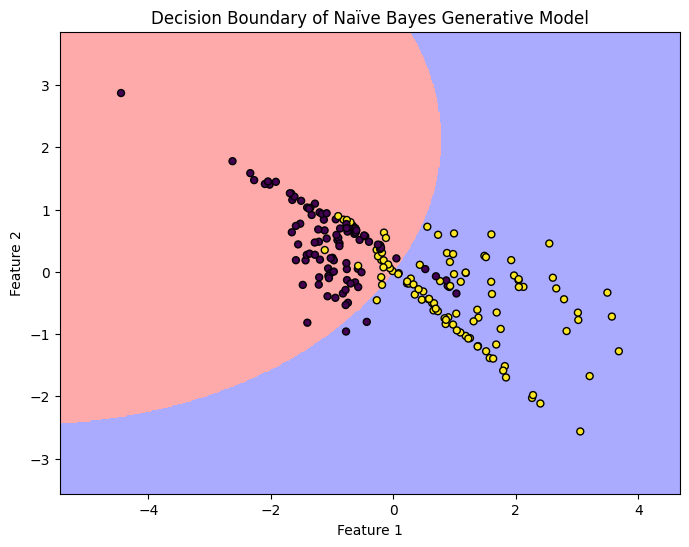

In [ ]:
# Define function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in mesh
    cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=25)
    plt.title("Decision Boundary of Naïve Bayes Generative Model")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot using only the first two features for visualization
plot_decision_boundary(nb_model, X_test[:, :2], y_test)

This decision boundary plot visualizes a Naïve Bayes generative model trained for binary classification. The red and blue regions represent the model’s predicted classes, while the curved boundary reflects the Gaussian distribution assumptions of Naïve Bayes. Yellow and black points denote data samples, with some misclassified points appearing in the opposite-colored regions due to Naïve Bayes' independence assumption, which may not perfectly fit real-world data. Since this is a generative model, it learns the probability distribution
𝑃
(
𝑋
∣
𝐶
)
P(X∣C) for each class and applies Bayes’ Theorem to compute
𝑃
(
𝐶
∣
𝑋
)
P(C∣X). While effective, the model can be improved using feature selection, Gaussian Mixture Models (GMM), or Kernel Naïve Bayes for better non-linear separations.